In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../data/playlist.csv')
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1217 non-null   float64
 1   energy            1217 non-null   float64
 2   loudness          1217 non-null   float64
 3   speechiness       1217 non-null   float64
 4   acousticness      1217 non-null   float64
 5   instrumentalness  1217 non-null   float64
 6   liveness          1217 non-null   float64
 7   valence           1217 non-null   float64
 8   tempo             1217 non-null   float64
 9   id                1217 non-null   object 
 10  duration_ms       1217 non-null   int64  
 11  names             1217 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 114.2+ KB


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,names
0,0.513,0.868,-5.061,0.0410,0.0185,0.000000,0.1210,0.367,92.009,1VU8t2MpJRLG5iFEIxqq7z,230467,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.2470,0.914000,0.0872,0.154,119.885,4YRvb9B8cgvhst11qk8CKn,360147,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977,7qiZfU4dY1lWllzX7mPBI3,233713,Shape of You
3,0.694,0.770,-5.335,0.1490,0.1760,0.000011,0.1180,0.163,125.905,0E9ZjEAyAwOXZ7wJC0PD33,184560,In My Mind
4,0.730,0.769,-5.114,0.0298,0.1380,0.000000,0.0473,0.507,104.948,4OSBTYWVwsQhGLF9NHvIbR,228093,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.781,0.445,-6.061,0.0295,0.4740,0.000000,0.1840,0.591,78.998,34gCuhDGsG4bRPIf9bb02f,281560,Thinking out Loud
1213,0.516,0.595,-4.630,0.0313,0.0275,0.000000,0.1090,0.222,119.972,5Ohxk2dO5COHF1krpoPigN,340707,Sign of the Times
1214,0.732,0.396,-9.348,0.0286,0.0841,0.000036,0.1050,0.548,90.024,6i0V12jOa3mr6uu4WYhUBr,195920,Heathens
1215,0.782,0.685,-6.237,0.0309,0.1660,0.000012,0.1600,0.603,118.020,7vFoFDWqTX0mHzLfrF1Cfy,180566,Cheerleader (Felix Jaehn Remix) - Radio Edit


In [3]:
# Select relevant acoustic features for clustering
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
X

array([[-0.81274261,  0.74119329,  0.39393673, ..., -0.74532936,
        -1.25824041,  0.12086739],
       [ 0.1111962 , -2.30489875, -1.59264786, ..., -1.60638606,
        -0.14117642,  2.62843753],
       [ 1.3546928 , -0.55145088,  1.09429451, ...,  1.53465177,
        -1.0992323 ,  0.18363399],
       ...,
       [ 0.70863032, -2.08347359, -1.2048033 , ..., -0.01363329,
        -1.33778453, -0.54715409],
       [ 1.05597574, -0.35396357, -0.04462596, ...,  0.2087053 ,
        -0.21591183, -0.84404823],
       [ 0.4446478 , -0.19238305,  0.81832818, ...,  1.00103916,
        -1.01724375, -0.4465651 ]])

## K-Means Clustering

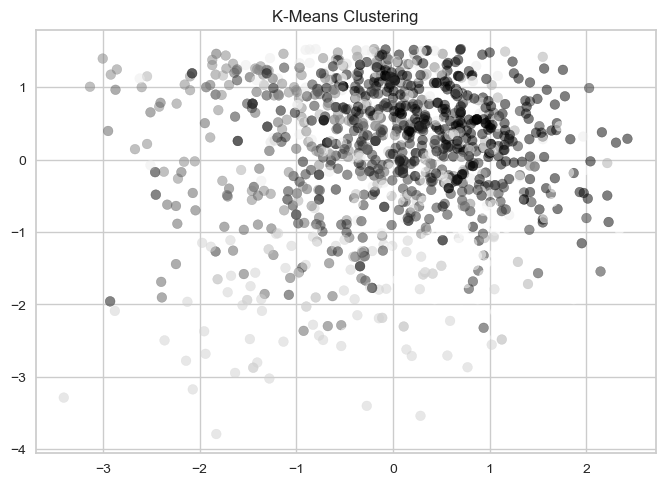

In [17]:
from sklearn.cluster import KMeans
# Set number of clusters
kmeans = KMeans(n_clusters=8)
# Fit the model
kmeans.fit(X)
# Predict cluster labels
pred = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
plt.title('K-Means Clustering')
plt.show()

In [19]:
# Calculate Silhouette Score to evaluate the quality of clustering
from sklearn.metrics import silhouette_score
print("K-Means Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

K-Means Silhouette Score: 0.13261719822634696


Since the K-Means Silhoutte score is 0.137 and thus really low and indicating that the clustering may not be very effective at grouping the songs into well-defined clusters.

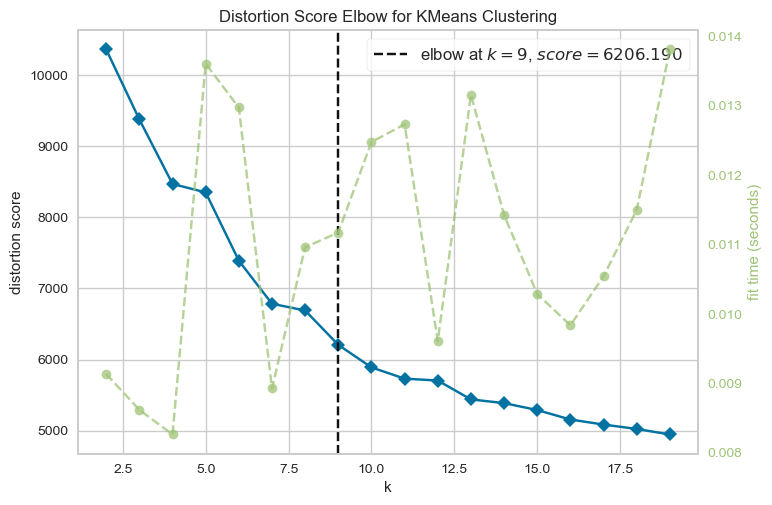

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer

# Use KElbowVisualizer to find the optimal number of clusters for KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.show()

## Agglomerative Clustering

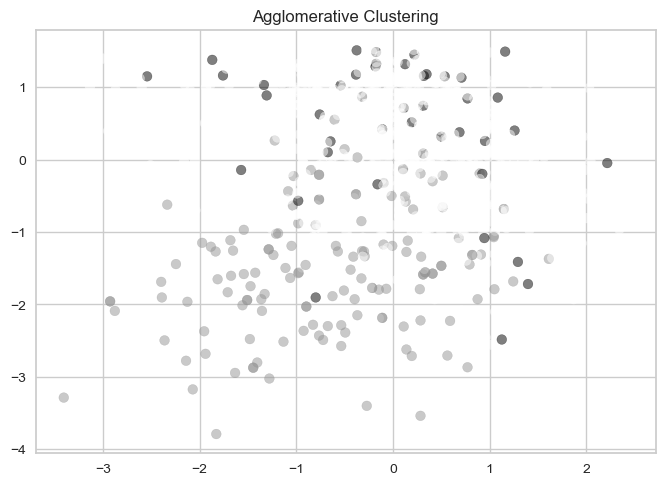

In [143]:
from sklearn import cluster

# Agglomerative Clustering with 'ward' linkage
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
pred = agglomerative.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
plt.title('Agglomerative Clustering')
plt.show()

In [144]:
# Calculate Silhouette Score
print("Agglomerative Clustering Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

Agglomerative Clustering Silhouette Score: 0.25203026452954236


Agglomerative Clustering Silhouette Score of 0.252 is a slight improvement on the k-means result.

In [145]:
# Try different linkage methods for Agglomerative Clustering
linkages = ['ward', 'single', 'complete', 'average']

for linkage in linkages:
    agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage=linkage)
    pred = agglomerative.fit_predict(X)
    score = silhouette_score(X, pred, metric='euclidean')
    print(f"Linkage: {linkage}, Silhouette Score: {score}")

Linkage: ward, Silhouette Score: 0.25203026452954236
Linkage: single, Silhouette Score: 0.45701724757733464
Linkage: complete, Silhouette Score: 0.15880624243472122
Linkage: average, Silhouette Score: 0.4332168938963849


With a linkage = single, the silhouette score performs the best at 0.
but single is not appropriate
so, we take 2nd best silhouette score of 0.4332168938963849 for average

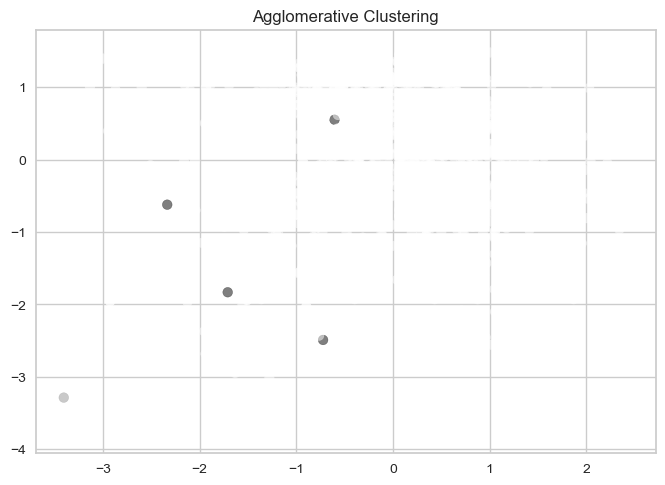

In [146]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='average')
pred = agglomerative.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
plt.title('Agglomerative Clustering')
plt.show()

In [147]:
pred

array([0, 0, 0, ..., 0, 0, 0])

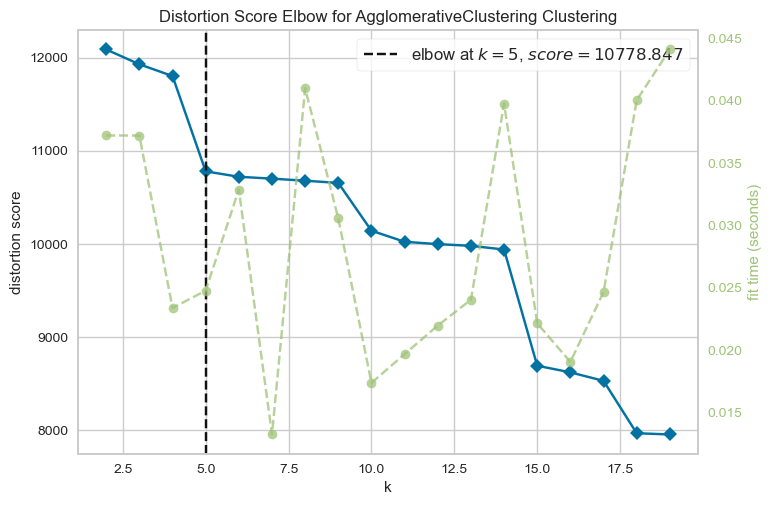

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [148]:
from yellowbrick.cluster import KElbowVisualizer

# Elbow Method for finding the optimal number of clusters
model = cluster.AgglomerativeClustering(linkage='average')
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.show()

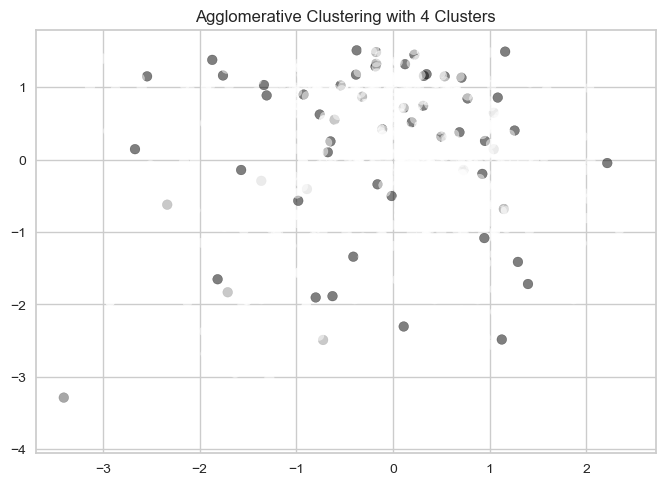

In [149]:
# Use 4 clusters as indicated by the Elbow Method
agglomerative = cluster.AgglomerativeClustering(n_clusters=5, linkage='average')
pred_5 = agglomerative.fit_predict(X)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=pred_5, alpha=0.5)
plt.title('Agglomerative Clustering with 4 Clusters')
plt.show()

In [150]:
# Calculate the Silhouette Score for 5 clusters
sil_score_5 = silhouette_score(X, pred_5, metric='euclidean')
print(f"Silhouette Score for Agglomerative Clustering with 15 Clusters: {sil_score_5}")

Silhouette Score for Agglomerative Clustering with 15 Clusters: 0.3264895535839765


ideal clustering = 3, linkage = average with 0.4332 as Silhouette Score

In [21]:
display(pred)

array([6, 3, 7, ..., 0, 6, 7], dtype=int32)

In [23]:
unique = np.unique(pred)
unique

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [25]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,names
0,0.513,0.868,-5.061,0.0410,0.0185,0.000000,0.1210,0.367,92.009,1VU8t2MpJRLG5iFEIxqq7z,230467,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.2470,0.914000,0.0872,0.154,119.885,4YRvb9B8cgvhst11qk8CKn,360147,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977,7qiZfU4dY1lWllzX7mPBI3,233713,Shape of You
3,0.694,0.770,-5.335,0.1490,0.1760,0.000011,0.1180,0.163,125.905,0E9ZjEAyAwOXZ7wJC0PD33,184560,In My Mind
4,0.730,0.769,-5.114,0.0298,0.1380,0.000000,0.0473,0.507,104.948,4OSBTYWVwsQhGLF9NHvIbR,228093,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.781,0.445,-6.061,0.0295,0.4740,0.000000,0.1840,0.591,78.998,34gCuhDGsG4bRPIf9bb02f,281560,Thinking out Loud
1213,0.516,0.595,-4.630,0.0313,0.0275,0.000000,0.1090,0.222,119.972,5Ohxk2dO5COHF1krpoPigN,340707,Sign of the Times
1214,0.732,0.396,-9.348,0.0286,0.0841,0.000036,0.1050,0.548,90.024,6i0V12jOa3mr6uu4WYhUBr,195920,Heathens
1215,0.782,0.685,-6.237,0.0309,0.1660,0.000012,0.1600,0.603,118.020,7vFoFDWqTX0mHzLfrF1Cfy,180566,Cheerleader (Felix Jaehn Remix) - Radio Edit


In [27]:
columns = ["id","names"]
name = df[columns]
name

,id,names
0,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
...,...,...
1212,34gCuhDGsG4bRPIf9bb02f,Thinking out Loud
1213,5Ohxk2dO5COHF1krpoPigN,Sign of the Times
1214,6i0V12jOa3mr6uu4WYhUBr,Heathens
1215,7vFoFDWqTX0mHzLfrF1Cfy,Cheerleader (Felix Jaehn Remix) - Radio Edit


In [29]:
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

features = df[features]
features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.513,0.868,-5.061,0.0410,0.0185,0.000000,0.1210,0.367,92.009,230467
1,0.646,0.359,-10.388,0.1550,0.2470,0.914000,0.0872,0.154,119.885,360147
2,0.825,0.652,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713
3,0.694,0.770,-5.335,0.1490,0.1760,0.000011,0.1180,0.163,125.905,184560
4,0.730,0.769,-5.114,0.0298,0.1380,0.000000,0.0473,0.507,104.948,228093
...,...,...,...,...,...,...,...,...,...,...
1212,0.781,0.445,-6.061,0.0295,0.4740,0.000000,0.1840,0.591,78.998,281560
1213,0.516,0.595,-4.630,0.0313,0.0275,0.000000,0.1090,0.222,119.972,340707
1214,0.732,0.396,-9.348,0.0286,0.0841,0.000036,0.1050,0.548,90.024,195920
1215,0.782,0.685,-6.237,0.0309,0.1660,0.000012,0.1600,0.603,118.020,180566


In [31]:
features["cluster"] = pred


/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_54119/2072673538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["cluster"] = pred


In [33]:
df = pd.concat([features, name], axis = 1)

In [35]:
display(df.head(50))

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.367,92.009,230467,6,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.154,119.885,360147,3,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713,7,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.163,125.905,184560,6,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.507,104.948,228093,6,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
5,0.655,0.797,-4.787,0.1530,0.19800,0.000000,0.0670,0.839,177.928,229360,4,6habFhsOp2NvshLv26DqMb,Despacito
6,0.591,0.176,-11.692,0.0396,0.63800,0.000005,0.2520,0.296,152.122,299147,2,1f1wT6Q7Buxb3OD0BqMW8O,"I See Fire - From ""The Hobbit - The Desolation..."
7,0.422,0.264,-7.064,0.0322,0.92200,0.000000,0.1320,0.331,119.930,269560,2,3U4isOIWM3VvDubwSI3y7a,All of Me
8,0.577,0.385,-6.362,0.0300,0.37100,0.000000,0.2310,0.331,95.820,215733,2,2VxeLyX666F8uXCJ0dZF8B,Shallow
9,0.599,0.448,-6.312,0.0232,0.16300,0.000000,0.1060,0.168,95.050,263400,6,0tgVpDi06FyKpA1z0VMD4v,Perfect


In [37]:
df.cluster.value_counts()

cluster
7    302
6    281
0    147
4    139
1    114
2     95
5     89
3     50
Name: count, dtype: int64

In [39]:
df.to_csv('playlist1000_final.csv', index=False)